<a href="https://colab.research.google.com/github/jcdevaney/pyAMPACTtutorials/blob/main/Tutorial_04_pyAMPACT_TAVERN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Parsing TAVERN using pyAMPACT</h1>

This notebook gives a quick demonstration of how to run some of pyAMPACT's primary functions and save the generated tables to csv files. Feel free to use this notebook as a way to create csv files of the results and save them locally. It's meant to be used on colab [here](https://colab.research.google.com/github/alexandermorgan/AMPACT/blob/main/AMPACT_Quick_Ref_Colab.ipynb#scrollTo=401a7ec7-e8ca-4944-ab81-8b9083cae543).

<h2>Import a the repo and create a Score object</h2>

You can import any type of symoblic notation file that music21 imports (kern, xml, mei, midi, abc, etc.). If you clone the repo your computer, you can import pieces locally from your computer. It's also convenient to import a piece from a url. Let's import one of the pieces from the TAVERN database and store the Score object to a variable called "piece". Note that if you're getting a file from github, make sure you use the "raw" link.

In [1]:
# Due to package dependencies issues, you will have to restart the runtime
# after running this cell and then and re-run it a second time

from IPython.utils import io
!pip install pyampact
import pyampact
import os
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
!git clone https://github.com/jcdevaney/pyAMPACTtutorials.git

Cloning into 'pyAMPACTtutorials'...
remote: Enumerating objects: 1022, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 1022 (delta 110), reused 97 (delta 78), pack-reused 869 (from 1)
Receiving objects: 100% (1022/1022), 147.54 MiB | 17.43 MiB/s, done.
Resolving deltas: 100% (462/462), done.
Updating files: 100% (554/554), done.


In [3]:
parent_dir = '/content/pyAMPACTtutorials/test_files/'
tavernList = []
errorList = []

krn_dir = os.path.join(parent_dir, 'B063', 'Stripped')
audio_dir = os.path.join(parent_dir, 'B063', 'Audio')

# Check if the audio directory exists
if os.path.exists(krn_dir):
    # Get the list of audio files in the audio directory
    kern_files = os.listdir(krn_dir)

    for kern_file in kern_files:
      align = []
      kern = os.path.join(krn_dir, kern_file)
      piece = pyampact.Score(kern)

      audio_file = kern_file.rsplit("_", 1)[0] + ".wav"
      audio = os.path.join(audio_dir, audio_file)
      #y, original_sr = custom_audioread(audio)
      y, original_sr = pyampact.load_audiofile(audio)

      try:
        piece.dtw, piece.spec, nmat = pyampact.run_alignment(y, original_sr, piece, piece.nmats())
      except:
        errorList.append(audio_file)

      tavernList.append(piece)


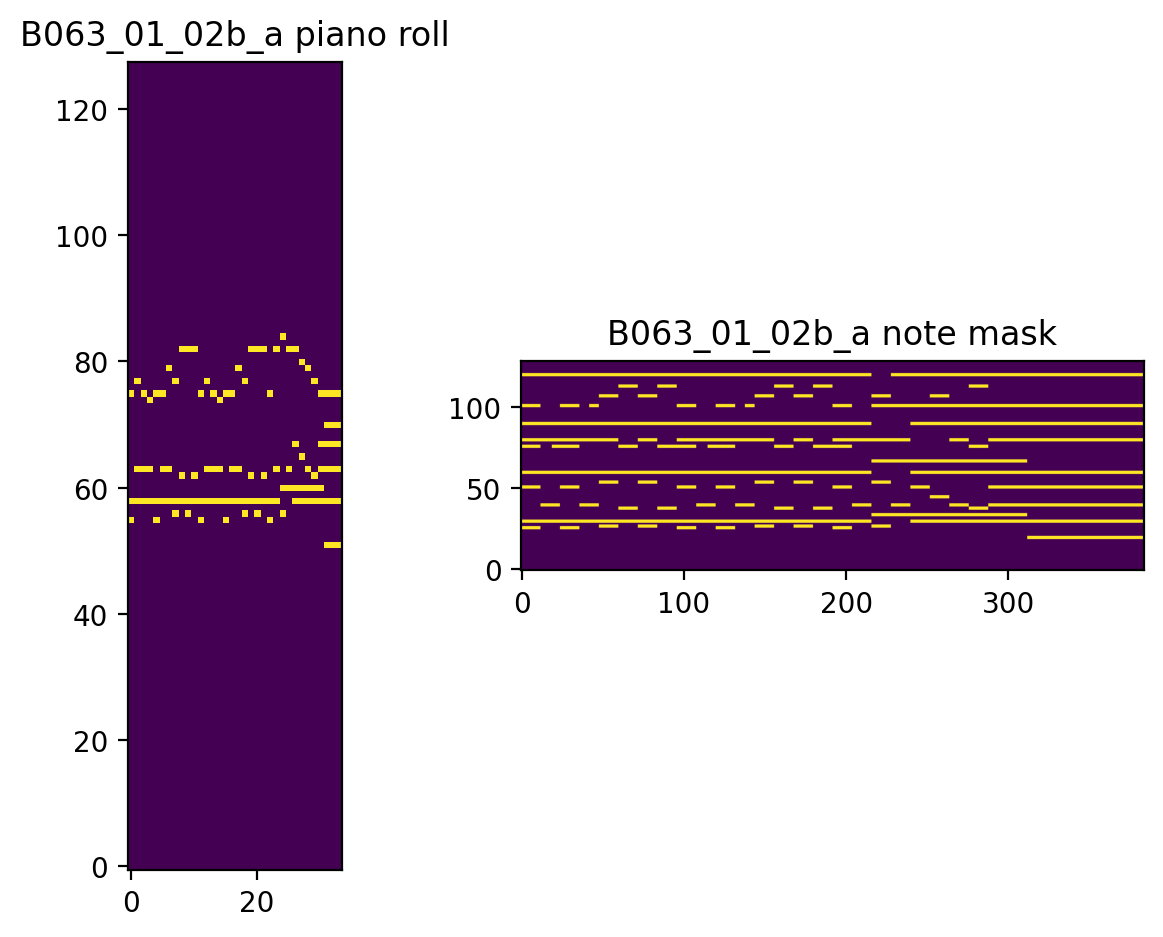

In [4]:
# Plot piano roll and mask with 4 harmonics and a bin width of 0
pianoRoll = tavernList[0].pianoRoll()
mask = tavernList[0].mask(num_harmonics=4, width=0)

graph, (plot1, plot2) = plt.subplots(1, 2)

# plot1 graph for normal axes
plot1.imshow(pianoRoll)
plot1.set_title(tavernList[0].fileName + ' piano roll')
plot1.invert_yaxis()

# plot2 graph for inverted axes
plot2.imshow(mask)
plot2.set_title(tavernList[0].fileName + ' note mask')
plot2.invert_yaxis()

# display the graph
graph.tight_layout()
plt.show()

There are three types of annotations in TAVERN: keys (keys), chords (harmonies), and harmonic functions (functions)

The snap_to argument specifies which repsentation the annotations will be aligned to (e.g., mask or piano roll)

In [5]:
tavernList[0].keys(snap_to=mask)

,keys
0.000000,c
0.041667,c
0.083333,c
0.125000,c
0.166667,c
...,...
15.791667,c
15.833333,c
15.875000,c
15.916667,c


In [6]:
tavernList[0].harm(snap_to=mask)

array(['Ib/III', 'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III',
       'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III',
       'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III',
       'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III',
       'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III',
       'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III',
       'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III',
       'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III', 'Ib/III',
       'V7d/III', 'V7d/III', 'V7d/III', 'V7d/III', 'V7d/III', 'V7d/III',
       'V7d/III', 'V7d/III', 'V7d/III', 'V7d/III', 'V7d/III', 'V7d/III',
       'V7d/III', 'V7d/III', 'V7d/III', 'V7d/III', 'V7d/III', 'V7d/III',
       'V7d/III', 'V7d/III', 'V7d/III', 'V7d/III', 'V7d/III', 'V7d/III',
       'V7d/III', 'V7d/III', 'V7d/III', 'V7d/III', 'V7d/III', 'V7d/III',
       'V7d/III', 'V7d/III', 'V7d/III', 'V7d/III', 'V7d/III', 'V7d/III',
       'V7d/III', 'V7d/III

In [7]:
tavernList[0].functions(snap_to=mask)

,Function
0.000000,T
0.041667,T
0.083333,T
0.125000,T
0.166667,T
...,...
15.791667,T
15.833333,T
15.875000,T
15.916667,T


To save any of these to a csv file, just use panda's to_csv method. You may want to remove the column labels ("header" argument) and the index. Let's save it to the "output_files" folder visible in the file browser on the right.

In [8]:
piece.sampled().to_csv('/content/pyAMPACTtutorials/output_files/Mozart_piece_mask.csv', header=False, index=False)